# Time Series Visualization of Sales Data

This notebook explores and visualizes the sales dataset from `test.csv`, which contains daily sales data for 7 stores and 10 products over 2019.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load the dataset
df = pd.read_csv('test.csv')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Display basic info
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())

Dataset shape: (25550, 4)

Data types:
Date           datetime64[ns]
store                   int64
product                 int64
number_sold             int64
dtype: object

First few rows:
        Date  store  product  number_sold
0 2019-01-01      0        0          845
1 2019-01-02      0        0          851
2 2019-01-03      0        0          840
3 2019-01-04      0        0          842
4 2019-01-05      0        0          845


## Data Exploration

The dataset contains daily sales data with the following characteristics:
- **Date range**: 2019-01-01 to 2019-12-31
- **Stores**: 7 stores (0-6)
- **Products**: 10 products (0-9)
- **Total records**: 25,550 entries

Each row represents the number of items sold for a specific product in a specific store on a given date.

In [3]:
# Aggregate total daily sales across all stores and products
daily_sales = df.groupby('Date')['number_sold'].sum().reset_index()

print("Daily sales summary:")
print(daily_sales.describe())

Daily sales summary:
                      Date   number_sold
count                  365    365.000000
mean   2019-07-02 00:00:00  55303.556164
min    2019-01-01 00:00:00  54714.000000
25%    2019-04-02 00:00:00  55046.000000
50%    2019-07-02 00:00:00  55279.000000
75%    2019-10-01 00:00:00  55562.000000
max    2019-12-31 00:00:00  55952.000000
std                    NaN    306.132720


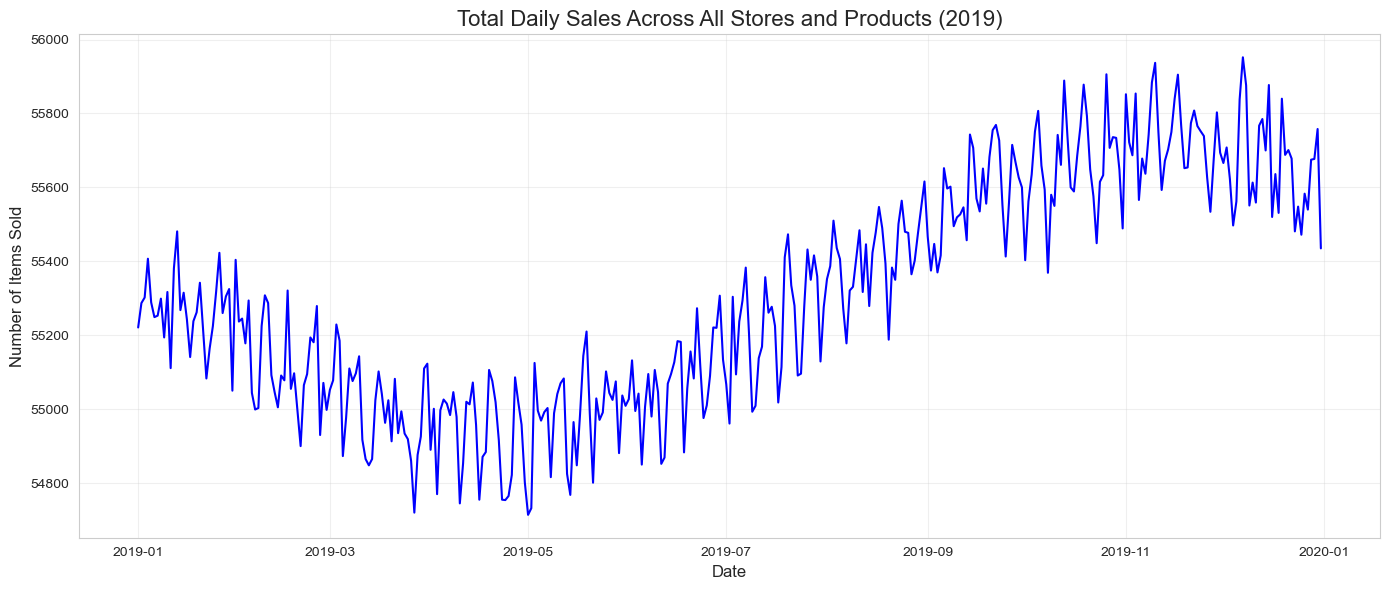

In [4]:
# Plot 1: Total Daily Sales Time Series
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['Date'], daily_sales['number_sold'], linewidth=1.5, color='blue')
plt.title('Total Daily Sales Across All Stores and Products (2019)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Items Sold', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Plot 1: Total Daily Sales Time Series

This plot shows the total number of items sold per day across all stores and products.

**Key observations:**
- **Seasonality**: Clear seasonal patterns with peaks around December (likely holiday season) and troughs in summer months
- **Trend**: Overall upward trend from January to December, suggesting increasing sales over the year
- **Abrupt changes**: Noticeable spikes around Christmas/New Year period (late December)
- **Variability**: Higher volatility during peak seasons compared to off-peak periods

In [5]:
# Aggregate sales for product 0 across all stores
product_0_sales = df[df['product'] == 0].groupby('Date')['number_sold'].sum().reset_index()

print("Product 0 sales summary:")
print(product_0_sales.describe())

Product 0 sales summary:
                      Date  number_sold
count                  365   365.000000
mean   2019-07-02 00:00:00  5226.463014
min    2019-01-01 00:00:00  5120.000000
25%    2019-04-02 00:00:00  5207.000000
50%    2019-07-02 00:00:00  5227.000000
75%    2019-10-01 00:00:00  5248.000000
max    2019-12-31 00:00:00  5317.000000
std                    NaN    29.970624


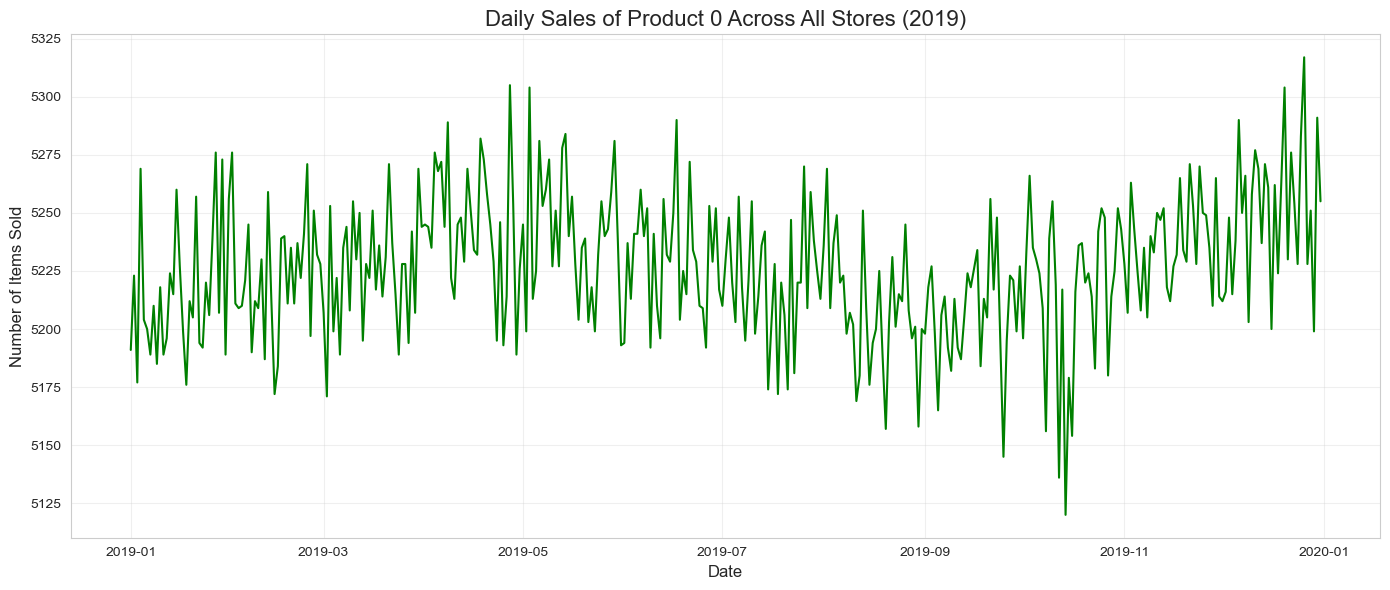

In [6]:
# Plot 2: Product 0 Sales Time Series
plt.figure(figsize=(14, 6))
plt.plot(product_0_sales['Date'], product_0_sales['number_sold'], linewidth=1.5, color='green')
plt.title('Daily Sales of Product 0 Across All Stores (2019)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Items Sold', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Plot 2: Product 0 Sales Time Series

This plot shows the daily sales of Product 0 aggregated across all stores.

**Key observations:**
- **Seasonality**: Similar seasonal pattern to total sales, with peaks in December and troughs in summer
- **Trend**: Steady increase throughout the year, indicating growing popularity or demand
- **Abrupt changes**: Sharp increase around mid-December, likely due to holiday shopping
- **Variability**: Relatively stable sales during non-peak periods with occasional dips

In [7]:
# Aggregate sales for store 0 across all products
store_0_sales = df[df['store'] == 0].groupby('Date')['number_sold'].sum().reset_index()

print("Store 0 sales summary:")
print(store_0_sales.describe())

Store 0 sales summary:
                      Date  number_sold
count                  365   365.000000
mean   2019-07-02 00:00:00  8544.320548
min    2019-01-01 00:00:00  8244.000000
25%    2019-04-02 00:00:00  8415.000000
50%    2019-07-02 00:00:00  8541.000000
75%    2019-10-01 00:00:00  8682.000000
max    2019-12-31 00:00:00  8887.000000
std                    NaN   159.941194


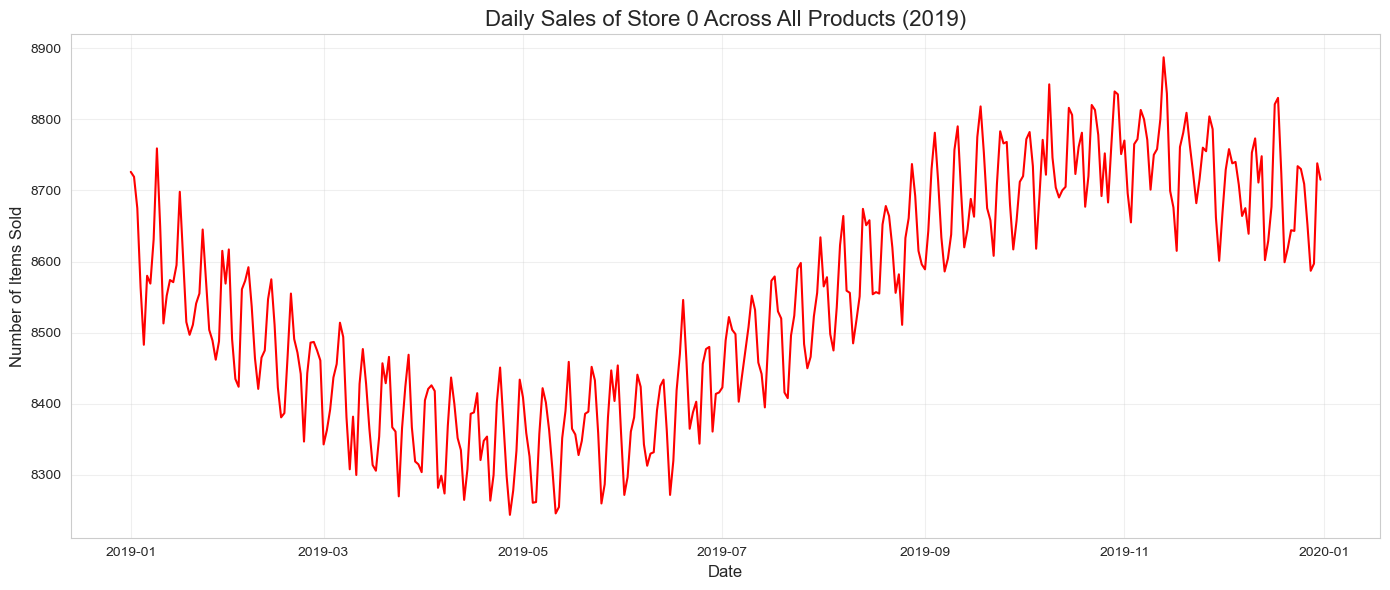

In [8]:
# Plot 3: Store 0 Sales Time Series
plt.figure(figsize=(14, 6))
plt.plot(store_0_sales['Date'], store_0_sales['number_sold'], linewidth=1.5, color='red')
plt.title('Daily Sales of Store 0 Across All Products (2019)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Items Sold', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Plot 3: Store 0 Sales Time Series

This plot shows the daily sales of Store 0 aggregated across all products.

**Key observations:**
- **Seasonality**: Exhibits the same seasonal pattern as the overall data, with winter peaks and summer troughs
- **Trend**: Consistent upward trend throughout the year, mirroring the total sales pattern
- **Abrupt changes**: Notable spike in late December, corresponding to holiday season
- **Variability**: Shows typical retail sales fluctuations with higher activity during weekends and holidays